In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [93]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")
target_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
targets_bin = df_train[target_columns]

In [94]:
df_train 

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


In [67]:
#df_train.corr()


In [68]:
#plt.figure(figsize=(30, 15))
#sns.heatmap(df_train.corr(),annot=True)

In [69]:
df_train[target_columns].sum(axis=1).value_counts()

1    18380
0      818
2       21
dtype: int64

In [46]:
df_train=df_train.loc[df_train[target_columns].sum(axis=1) != 0]
df_train=df_train.reset_index().drop("index",axis=1)

In [47]:
df_test.isna().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

In [95]:
 
df_train.loc[df_train[target_columns].sum(axis=1) == 2, "Other_Faults"] = 0
df_train.loc[df_train[target_columns].sum(axis=1) == 2, "Pastry"] = 0
df_train.loc[df_train[target_columns].sum(axis=1) == 2, "Bumps"] = 0

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

dtr=df_train.drop(target_columns,axis=1)
dtr=dtr.drop("id",axis=1)
df_test=df_test.drop("id",axis=1)
#dtt=df_test.drop(target_columns,axis=1)
X =  pd.concat([dtr, df_test], axis=0)
y = [0] * len(dtr) + [1] * len(df_test)

model = RandomForestClassifier(random_state=0)
cv_preds = cross_val_predict(model, X, y, cv=5, n_jobs=-1, method='predict_proba')

score = roc_auc_score(y_true=y, y_score=cv_preds[:,1])
print(f"roc-auc score: {score:0.3f}")

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:

#df_train = df_train.drop(df_train[df_train['Y_Maximum'] < df_train['Y_Minimum']].index)

#df_train[df_train['Y_Maximum'] <df_train['Y_Minimum']]
#df_train[df_train['X_Maximum'] <df_train['X_Minimum']]

In [ ]:
#df_test[df_test['Y_Maximum'] <df_test['Y_Minimum']]

In [96]:
def calculate_coordinate_range_features(data):
    data['X_Range'] = (data['X_Maximum'] - data['X_Minimum'])
    data['Y_Range'] =( data['Y_Maximum'] - data['Y_Minimum'])
    return data

df_train = calculate_coordinate_range_features(df_train)
df_test = calculate_coordinate_range_features(df_test)

def calculate_size_ratio_features(data):
    data['Area_Perimeter_Ratio'] = data['Pixels_Areas'] / (data['X_Perimeter'] + data['Y_Perimeter'])
    return data

df_train = calculate_size_ratio_features(df_train)
df_test = calculate_size_ratio_features(df_test)

def calculate_luminosity_range_feature(data):
    data['Luminosity_Range'] = (data['Maximum_of_Luminosity'] - data['Minimum_of_Luminosity'])
    return data

df_train = calculate_luminosity_range_feature(df_train)
df_test = calculate_luminosity_range_feature(df_test)

In [97]:
import numpy as np

# 1. Aspect Ratio
df_train['Aspect_Ratio'] = (df_train['X_Maximum'] - df_train['X_Minimum']) / (df_train['Y_Maximum'] - df_train['Y_Minimum'])
df_test['Aspect_Ratio'] = (df_test['X_Maximum'] - df_test['X_Minimum']) / (df_test['Y_Maximum'] - df_test['Y_Minimum'])

# 2. Area Perimeter Ratio
df_train['Area_Perimeter_Ratio'] = df_train['Pixels_Areas'] / (df_train['X_Perimeter'] + df_train['Y_Perimeter'])
df_test['Area_Perimeter_Ratio'] = df_test['Pixels_Areas'] / (df_test['X_Perimeter'] + df_test['Y_Perimeter'])

# 3. Intensity Range
df_train['Intensity_Range'] = df_train['Maximum_of_Luminosity'] - df_train['Minimum_of_Luminosity']
df_test['Intensity_Range'] = df_test['Maximum_of_Luminosity'] - df_test['Minimum_of_Luminosity']

 

# Define grid size for spatial density
grid_size = 10
max_x = max(df_train['X_Minimum'].max(), df_test['X_Minimum'].max())  # Get maximum X coordinate
max_y = max(df_train['Y_Minimum'].max(), df_test['Y_Minimum'].max())  # Get maximum Y coordinate

# Adjust binning range based on maximum coordinates
bin_range_x = np.linspace(0, max_x, grid_size + 1)  # Add 1 to grid_size for inclusive endpoint
bin_range_y = np.linspace(0, max_y, grid_size + 1)

# Create grid cell columns
df_train['Grid_Cell_X'] = pd.cut(df_train['X_Minimum'], bins=bin_range_x, labels=False)
df_train['Grid_Cell_Y'] = pd.cut(df_train['Y_Minimum'], bins=bin_range_y, labels=False)
df_test['Grid_Cell_X'] = pd.cut(df_test['X_Minimum'], bins=bin_range_x, labels=False)
df_test['Grid_Cell_Y'] = pd.cut(df_test['Y_Minimum'], bins=bin_range_y,labels=False)

# Compute spatial density
# Compute spatial density
#df_train['Spatial_Density'] = df_train.groupby(['Grid_Cell_X', 'Grid_Cell_Y']).size().reset_index(level=[0, 1], drop=True)
#df_test['Spatial_Density'] = df_test.groupby(['Grid_Cell_X', 'Grid_Cell_Y']).size().reset_index(level=[0, 1], drop=True)


# 7. Logarithmic Ratios
df_train['Logarithmic_Ratio'] = df_train['LogOfAreas'] / df_train['Log_X_Index']
df_test['Logarithmic_Ratio'] = df_test['LogOfAreas'] / df_test['Log_X_Index']

# 8. Statistical Aggregations
# Example: Mean of Pixels_Areas within a 3x3 neighborhood
df_train['Pixels_Areas_Mean'] = df_train.groupby(['X_Minimum', 'Y_Minimum'])['Pixels_Areas'].transform('mean')
df_test['Pixels_Areas_Mean'] = df_test.groupby(['X_Minimum', 'Y_Minimum'])['Pixels_Areas'].transform('mean')

# 9. Interaction Terms
df_train['Interaction_Term'] = df_train['Pixels_Areas'] * df_train['Intensity_Range']
df_test['Interaction_Term'] = df_test['Pixels_Areas'] * df_test['Intensity_Range']

 
# 1. Compactness
df_train['Compactness'] = df_train['Pixels_Areas'] / (df_train['X_Perimeter'] + df_train['Y_Perimeter'])**2
df_test['Compactness'] = df_test['Pixels_Areas'] / (df_test['X_Perimeter'] + df_test['Y_Perimeter'])**2

# 2. Circularity
df_train['Circularity'] = (4 * np.pi * df_train['Pixels_Areas']) / (df_train['X_Perimeter'] + df_train['Y_Perimeter'])**2
df_test['Circularity'] = (4 * np.pi * df_test['Pixels_Areas']) / (df_test['X_Perimeter'] + df_test['Y_Perimeter'])**2

# 3. Density within Grid Cells
# 3. Density within Grid Cells
# 3. Density within Grid Cells
density_train = df_train.groupby(['Grid_Cell_X', 'Grid_Cell_Y']).size().reset_index(name='Density_Grid_Cells')
df_train = pd.merge(df_train, density_train, on=['Grid_Cell_X', 'Grid_Cell_Y'], how='left')

density_test = df_test.groupby(['Grid_Cell_X', 'Grid_Cell_Y']).size().reset_index(name='Density_Grid_Cells')
df_test = pd.merge(df_test, density_test, on=['Grid_Cell_X', 'Grid_Cell_Y'], how='left')


# 4. Distance from Center
X_Center = (df_train['X_Minimum'] + df_train['X_Maximum']) / 2
Y_Center = (df_train['Y_Minimum'] + df_train['Y_Maximum']) / 2
df_train['Distance_From_Center'] = np.sqrt((X_Center - df_train['X_Minimum'])**2 + (Y_Center - df_train['Y_Minimum'])**2)

X_Center_test = (df_test['X_Minimum'] + df_test['X_Maximum']) / 2
Y_Center_test = (df_test['Y_Minimum'] + df_test['Y_Maximum']) / 2
df_test['Distance_From_Center'] = np.sqrt((X_Center_test - df_test['X_Minimum'])**2 + (Y_Center_test - df_test['Y_Minimum'])**2)

# 6. Edge Density Ratio
df_train['Edge_Density_Ratio'] = df_train['Edges_Index'] / df_train['Pixels_Areas']
df_test['Edge_Density_Ratio'] = df_test['Edges_Index'] / df_test['Pixels_Areas']

# 7. Gradient of Luminosity (Example)
df_train['Luminosity_Gradient'] = df_train['Maximum_of_Luminosity'] - df_train['Minimum_of_Luminosity']
df_test['Luminosity_Gradient'] = df_test['Maximum_of_Luminosity'] - df_test['Minimum_of_Luminosity']

# 8. Orientation Relative to Edges (Example)
df_train['Orientation_Edge'] = df_train['Orientation_Index'] * df_train['Edges_Index']
df_test['Orientation_Edge'] = df_test['Orientation_Index'] * df_test['Edges_Index']

# 9. Spatial Aggregation (Example: Mean of Pixels_Areas within a 3x3 neighborhood)
df_train['Pixels_Areas_Mean_Neighborhood'] = df_train.groupby(['X_Minimum', 'Y_Minimum'])['Pixels_Areas'].transform('mean')
df_test['Pixels_Areas_Mean_Neighborhood'] = df_test.groupby(['X_Minimum', 'Y_Minimum'])['Pixels_Areas'].transform('mean')

# 10. Interaction Terms with Categorical Features (Example)
df_train['Interaction_Steel_Type'] = df_train['Pixels_Areas'] * df_train['TypeOfSteel_A300']
df_test['Interaction_Steel_Type'] = df_test['Pixels_Areas'] * df_test['TypeOfSteel_A300']


In [98]:
df_train=df_train.drop("id",axis=1)
df_test=df_test.drop("id",axis=1)

In [99]:
df_train

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,X_Range,Y_Range,Area_Perimeter_Ratio,Luminosity_Range,Aspect_Ratio,Intensity_Range,Grid_Cell_X,Grid_Cell_Y,Logarithmic_Ratio,Pixels_Areas_Mean,Interaction_Term,Compactness,Circularity,Density_Grid_Cells,Distance_From_Center,Edge_Density_Ratio,Luminosity_Gradient,Orientation_Edge,Pixels_Areas_Mean_Neighborhood,Interaction_Steel_Type
0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0,6,5,1.230769,27,1.200000,27,3.0,0,1.333296,16.000000,432,0.094675,1.189716,884.0,3.905125,0.046206,27,-0.369650,16.000000,0
1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1,8,22,5.851351,41,0.363636,41,4.0,0,3.387947,433.000000,17753,0.079072,0.993652,854.0,11.704700,0.001795,41,0.576605,433.000000,433
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0,153,68,10.122667,112,2.250000,112,0.0,1,1.861588,8152.166667,1275456,0.008998,0.113071,2523.0,83.715291,0.000005,112,-0.000585,8152.166667,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0,8,27,4.666667,20,0.296296,20,4.0,2,2.984066,210.000000,4200,0.103704,1.303179,172.0,14.080128,0.003430,20,0.480157,210.000000,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1,20,45,3.748201,29,0.444444,29,9.0,0,1.957173,521.000000,15109,0.026965,0.338858,690.0,24.622145,0.000232,29,0.110903,521.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0,8,9,2.125000,18,0.888889,18,4.0,0,1.581213,17.000000,306,0.265625,3.337942,854.0,6.020797,0.052647,18,-0.127895,17.000000,0
19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1,12,12,5.372093,29,1.000000,29,4.0,1,2.269637,231.000000,6699,0.124932,1.569947,402.0,8.485281,0.004001,29,0.667529,231.000000,231
19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0,25,74,3.679245,53,0.337838,53,0.0,1,2.020469,780.000000,41340,0.017355,0.218088,2523.0,39.054449,0.000019,53,0.011424,780.000000,0
19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1,9,12,3.230769,44,0.750000,44,0.0,1,2.016900,126.000000,5544,0.082840,1.041001,2523.0,7.500000,0.000152,44,0.018451,126.000000,126


In [100]:
df_test.isna().sum()

X_Minimum                           0
X_Maximum                           0
Y_Minimum                           0
Y_Maximum                           0
Pixels_Areas                        0
X_Perimeter                         0
Y_Perimeter                         0
Sum_of_Luminosity                   0
Minimum_of_Luminosity               0
Maximum_of_Luminosity               0
Length_of_Conveyer                  0
TypeOfSteel_A300                    0
TypeOfSteel_A400                    0
Steel_Plate_Thickness               0
Edges_Index                         0
Empty_Index                         0
Square_Index                        0
Outside_X_Index                     0
Edges_X_Index                       0
Edges_Y_Index                       0
Outside_Global_Index                0
LogOfAreas                          0
Log_X_Index                         0
Log_Y_Index                         0
Orientation_Index                   0
Luminosity_Index                    0
SigmoidOfAre

In [ ]:
#df_train.corr()

In [ ]:
#df_train[target_columns]

In [101]:

target = df_train[target_columns]@(np.arange(df_train[target_columns].shape[1]))
target[df_train[target_columns].sum(axis=1)==2] = 3

df_train=df_train.drop(target_columns,axis=1)

In [102]:
target

0        3
1        6
2        2
3        2
4        6
        ..
19214    3
19215    6
19216    0
19217    6
19218    5
Length: 19219, dtype: int64

In [103]:
df_test

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,X_Range,Y_Range,Area_Perimeter_Ratio,Luminosity_Range,Aspect_Ratio,Intensity_Range,Grid_Cell_X,Grid_Cell_Y,Logarithmic_Ratio,Pixels_Areas_Mean,Interaction_Term,Compactness,Circularity,Density_Grid_Cells,Distance_From_Center,Edge_Density_Ratio,Luminosity_Gradient,Orientation_Edge,Pixels_Areas_Mean_Neighborhood,Interaction_Steel_Type
0,1015,1033,3826564,3826588,659,23,46,62357,67,127,1656,0,1,150,0.3877,0.4896,0.3273,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172,18,24,9.550725,60,0.750000,60,5.0,2,2.550498,659.000000,39540,0.138416,1.739391,127.0,15.000000,0.000588,60,0.260806,659.000000,0
1,1257,1271,419960,419973,370,26,28,39293,92,132,1354,0,1,40,0.1629,0.4136,0.0938,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104,14,13,6.851852,40,1.076923,40,7.0,0,2.843760,370.000000,14800,0.126886,1.594498,807.0,9.552487,0.000440,40,0.147636,370.000000,0
2,1358,1372,117715,117724,289,36,32,29386,101,134,1360,0,1,40,0.0609,0.6234,0.4762,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514,14,9,4.250000,33,1.555556,33,7.0,0,1.861216,289.000000,9537,0.062500,0.785398,807.0,8.321658,0.000211,33,-0.031899,289.000000,0
3,158,168,232415,232440,80,10,11,8586,107,140,1690,1,0,100,0.4439,0.3333,0.8182,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051,10,25,3.809524,33,0.400000,33,0.0,0,2.722604,80.000000,2640,0.181406,2.279614,1318.0,13.462912,0.005549,33,0.080701,80.000000,80
4,559,592,544375,544389,140,19,15,15524,103,134,1688,1,0,60,0.8191,0.2619,0.4286,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170,33,14,4.117647,31,2.357143,31,3.0,0,1.623128,140.000000,4340,0.121107,1.521879,599.0,17.923448,0.005851,31,-0.468034,140.000000,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,1101,1116,447943,447992,313,32,37,21603,79,103,1353,0,1,70,0.2853,0.3050,0.2339,0.0126,0.4063,0.9194,1.0,2.4955,1.2305,1.6335,0.7661,-0.3109,0.8894,15,49,4.536232,24,0.306122,24,6.0,0,2.028037,313.000000,7512,0.065742,0.826145,953.0,25.622256,0.000912,24,0.218568,313.000000,0
12810,1289,1306,3149494,3149542,59,9,18,5249,113,141,1362,0,1,40,0.0106,0.2778,0.2778,0.0052,0.7778,1.0000,1.0,1.7708,0.8451,1.2553,0.7222,-0.0448,0.1954,17,48,2.185185,28,0.354167,28,7.0,2,2.095373,59.000000,1652,0.080933,1.017031,163.0,25.460754,0.000180,28,0.007655,59.000000,0
12811,41,210,1587535,1587191,16584,796,522,1858162,24,143,1400,0,1,40,0.0557,0.5644,0.9371,0.1236,0.2199,0.4097,0.0,4.2525,2.2504,2.2672,-0.0629,-0.0801,1.0000,169,-344,12.582701,119,-0.491279,119,0.0,1,1.889664,11357.333333,1973496,0.009547,0.119969,1674.0,191.635722,0.000003,119,-0.003504,11357.333333,0
12812,1329,1340,702237,702267,386,43,34,36875,66,124,1364,0,1,40,0.0133,0.1814,0.1539,0.0095,0.2407,1.0000,1.0,2.5866,1.1139,1.5911,0.8461,-0.2629,0.7844,11,30,5.012987,58,0.366667,58,7.0,0,2.322112,386.000000,22388,0.065104,0.818118,807.0,15.976545,0.000034,58,0.011253,386.000000,0


In [104]:
df_train[df_train.isin([np.inf, -np.inf]).any(axis=1)]

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,X_Range,Y_Range,Area_Perimeter_Ratio,Luminosity_Range,Aspect_Ratio,Intensity_Range,Grid_Cell_X,Grid_Cell_Y,Logarithmic_Ratio,Pixels_Areas_Mean,Interaction_Term,Compactness,Circularity,Density_Grid_Cells,Distance_From_Center,Edge_Density_Ratio,Luminosity_Gradient,Orientation_Edge,Pixels_Areas_Mean_Neighborhood,Interaction_Steel_Type
33,933,940,7307792,7307792,12,6,4,1504,110,134,1358,0,1,50,0.6471,0.5500,1.0000,0.0044,1.0000,1.0000,0.5,1.0792,0.7782,0.6021,0.0000,-0.0840,0.1361,7,0,1.200000,24,inf,24,5.0,5,1.386790,12.0,288,0.120000,1.507964,28.0,3.5,0.053925,24,0.000000,12.0,0
224,49,61,1803992,1803992,120,28,18,16912,97,132,1353,1,0,70,0.0746,0.2899,0.8889,0.0103,0.9375,0.9231,0.0,2.0792,1.1461,1.1761,-0.1111,-0.1093,0.4763,12,0,2.608696,35,inf,35,0.0,1,1.814152,120.0,4200,0.056711,0.712649,2523.0,6.0,0.000622,35,-0.008288,120.0,120
282,623,631,1715283,1715283,80,10,11,14669,108,149,1628,1,0,120,0.9269,0.4000,1.0000,0.0053,0.9000,0.9091,0.5,1.9031,0.9542,1.0000,0.0000,-0.0802,0.2359,8,0,3.809524,41,inf,41,3.0,1,1.994446,121.0,3280,0.181406,2.279614,590.0,4.0,0.011586,41,0.000000,121.0,80
328,39,197,1175131,1175131,17825,821,541,2144244,26,141,1398,0,1,40,0.0556,0.3394,0.9854,0.1114,0.2056,0.3911,1.0,4.2510,2.1987,2.2227,0.0146,-0.0993,1.0000,158,0,13.087372,115,inf,115,0.0,0,1.933415,17825.0,2049875,0.009609,0.120749,1936.0,79.0,0.000003,115,0.000812,17825.0,0
363,39,214,1435593,1435593,6239,222,124,658914,43,124,1358,0,1,40,0.0574,0.4556,0.3771,0.1289,0.7883,0.5778,0.0,3.8450,2.2430,1.8129,-0.6229,-0.1847,1.0000,175,0,18.031792,81,inf,81,0.0,1,1.714222,6239.0,505359,0.052115,0.654896,2523.0,87.5,0.000009,81,-0.035754,6239.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18562,828,835,1444004,1444004,77,9,14,8359,80,126,1658,1,0,100,0.9401,0.2400,0.6429,0.0041,0.7778,1.0000,1.0,1.8865,0.8451,1.1461,0.3571,-0.2069,0.1753,7,0,3.347826,46,inf,46,4.0,1,2.232280,77.0,3542,0.145558,1.829131,402.0,3.5,0.012209,46,0.335710,77.0,77
18725,981,994,9921344,9921344,51,11,10,6294,93,151,1360,1,0,70,0.7618,0.2333,0.9000,0.0074,0.9091,1.0000,0.0,1.7076,1.0000,0.9542,-0.1000,-0.0753,0.1753,13,0,2.428571,58,inf,58,5.0,7,1.707600,51.0,2958,0.115646,1.453254,22.0,6.5,0.014937,58,-0.076180,51.0,51
18950,1541,1565,345626,345626,226,36,31,23642,52,124,1686,1,0,80,0.1261,0.5605,0.5652,0.0077,0.3611,0.9677,1.0,2.3541,1.1139,1.4771,0.4348,-0.1835,0.4946,24,0,3.373134,72,inf,72,9.0,0,2.113385,226.0,16272,0.050345,0.632658,690.0,12.0,0.000558,72,0.054828,226.0,226
19044,1219,1228,1292303,1292303,8,8,5,1063,111,132,1694,1,0,70,0.7771,0.2222,0.6000,0.0074,1.0000,1.0000,0.0,0.9031,1.0000,0.6021,-0.4000,-0.0557,0.1284,9,0,0.615385,21,inf,21,7.0,0,0.903100,8.0,168,0.047337,0.594858,1227.0,4.5,0.097138,21,-0.310840,8.0,8


C:\Users\dials\AppData\Local\Temp\ipykernel_9320\1763759082.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train["Aspect_Ratio"].replace([np.inf, -np.inf], df_train[df_train["Aspect_Ratio"] != np.inf][df_train["Aspect_Ratio"] != -np.inf]["Aspect_Ratio"].mean(), inplace=True)
C:\Users\dials\AppData\Local\Temp\ipykernel_9320\1763759082.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test["Aspect_Ratio"].replace([np.inf, -np.inf], df_test[df_test["Aspect_Ratio"] != np.inf][df_test["Aspect_Ratio"] != -np.inf]["Aspect_Ratio"].mean(), inplace=True)


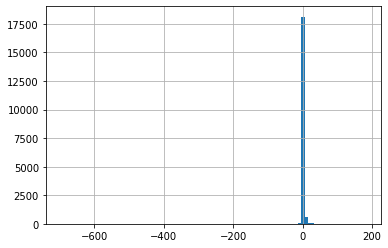

In [105]:
df_train[df_train["Aspect_Ratio"]!=np.inf]["Aspect_Ratio"].mean()
df_train[df_train["Aspect_Ratio"]!=np.inf]["Aspect_Ratio"].std()
df_train[df_train["Aspect_Ratio"]!=np.inf]["Aspect_Ratio"].max()
df_train[df_train["Aspect_Ratio"]!=np.inf]["Aspect_Ratio"].min()
df_train[df_train["Aspect_Ratio"]!=np.inf]["Aspect_Ratio"].hist(bins=100)
df_train["Aspect_Ratio"].replace([np.inf, -np.inf], df_train[df_train["Aspect_Ratio"] != np.inf][df_train["Aspect_Ratio"] != -np.inf]["Aspect_Ratio"].mean(), inplace=True)
df_test["Aspect_Ratio"].replace([np.inf, -np.inf], df_test[df_test["Aspect_Ratio"] != np.inf][df_test["Aspect_Ratio"] != -np.inf]["Aspect_Ratio"].mean(), inplace=True)

In [106]:
np.isinf(df_test).any(axis=None)

False

In [107]:
df_train

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,X_Range,Y_Range,Area_Perimeter_Ratio,Luminosity_Range,Aspect_Ratio,Intensity_Range,Grid_Cell_X,Grid_Cell_Y,Logarithmic_Ratio,Pixels_Areas_Mean,Interaction_Term,Compactness,Circularity,Density_Grid_Cells,Distance_From_Center,Edge_Density_Ratio,Luminosity_Gradient,Orientation_Edge,Pixels_Areas_Mean_Neighborhood,Interaction_Steel_Type
0,584,590,909972,909977,16,8,5,2274,113,140,1358,0,1,50,0.7393,0.4000,0.5000,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417,6,5,1.230769,27,1.200000,27,3.0,0,1.333296,16.000000,432,0.094675,1.189716,884.0,3.905125,0.046206,27,-0.369650,16.000000,0
1,808,816,728350,728372,433,20,54,44478,70,111,1687,1,0,80,0.7772,0.2878,0.2581,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491,8,22,5.851351,41,0.363636,41,4.0,0,3.387947,433.000000,17753,0.079072,0.993652,854.0,11.704700,0.001795,41,0.576605,433.000000,433
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,1400,0,1,40,0.0557,0.5282,0.9895,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000,153,68,10.122667,112,2.250000,112,0.0,1,1.861588,8152.166667,1275456,0.008998,0.113071,2523.0,83.715291,0.000005,112,-0.000585,8152.166667,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,1387,0,1,40,0.7202,0.3333,0.3333,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025,8,27,4.666667,20,0.296296,20,4.0,2,2.984066,210.000000,4200,0.103704,1.303179,172.0,14.080128,0.003430,20,0.480157,210.000000,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,1692,0,1,300,0.1211,0.5347,0.0842,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998,20,45,3.748201,29,0.444444,29,9.0,0,1.957173,521.000000,15109,0.026965,0.338858,690.0,24.622145,0.000232,29,0.110903,521.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,1360,0,0,50,0.8950,0.1500,0.8571,0.0044,1.0000,0.8000,0.0,1.2305,0.7782,0.6021,-0.1429,0.0044,0.2901,8,9,2.125000,18,0.888889,18,4.0,0,1.581213,17.000000,306,0.265625,3.337942,854.0,6.020797,0.052647,18,-0.127895,17.000000,0
19215,723,735,2488529,2488541,231,17,26,27135,104,133,1652,1,0,70,0.9243,0.3254,0.2778,0.0065,0.7333,0.9216,1.0,2.3636,1.0414,1.4150,0.7222,-0.0989,0.5378,12,12,5.372093,29,1.000000,29,4.0,1,2.269637,231.000000,6699,0.124932,1.569947,402.0,8.485281,0.004001,29,0.667529,231.000000,231
19216,6,31,1578055,1578129,780,114,98,71112,41,94,1358,0,1,200,0.0148,0.4331,0.2281,0.0199,0.1862,0.9554,1.0,2.8921,1.4314,1.8692,0.7719,-0.4283,0.9997,25,74,3.679245,53,0.337838,53,0.0,1,2.020469,780.000000,41340,0.017355,0.218088,2523.0,39.054449,0.000019,53,0.011424,780.000000,0
19217,9,18,1713172,1713184,126,13,26,14808,88,132,1692,1,0,60,0.0192,0.2361,0.0390,0.0068,0.7692,1.0000,1.0,2.1004,1.0414,1.4150,0.9610,-0.1162,0.3509,9,12,3.230769,44,0.750000,44,0.0,1,2.016900,126.000000,5544,0.082840,1.041001,2523.0,7.500000,0.000152,44,0.018451,126.000000,126


In [108]:
[x for x in df_train.columns if x not in df_test.columns]


[]

In [109]:
from sklearn.preprocessing import MinMaxScaler


df_train = df_train.astype(np.float64)
df_test = df_test.astype(np.float64)

mmscaler = MinMaxScaler()

mmscaler.fit(df_train)

df_train[:] = mmscaler.transform(df_train)
df_test[:] = mmscaler.transform(df_test)



In [110]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(5, shuffle=True, random_state=0)
cv_splits = cv.split(df_train, y=target)

In [111]:
df_train

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,X_Range,Y_Range,Area_Perimeter_Ratio,Luminosity_Range,Aspect_Ratio,Intensity_Range,Grid_Cell_X,Grid_Cell_Y,Logarithmic_Ratio,Pixels_Areas_Mean,Interaction_Term,Compactness,Circularity,Density_Grid_Cells,Distance_From_Center,Edge_Density_Ratio,Luminosity_Gradient,Orientation_Edge,Pixels_Areas_Mean_Neighborhood,Interaction_Steel_Type
0,0.342522,0.342891,0.069584,0.069583,0.000066,0.000795,0.004435,0.000175,0.576531,0.471963,0.231041,0.0,1.0,0.038462,0.742866,0.431267,0.495815,0.006631,1.000000,1.000000,0.0,0.112788,0.223306,0.173307,0.246654,0.572720,0.025766,0.406015,0.514392,0.002150,0.292419,0.794900,0.292419,0.333333,0.000000,0.121727,0.000066,0.000354,0.052838,0.052838,0.350119,5.530754e-07,0.299102,0.292419,0.293010,0.000066,0.000000
1,0.473900,0.475132,0.055592,0.055593,0.002797,0.002384,0.058758,0.003816,0.357143,0.336449,0.811287,1.0,0.0,0.153846,0.780949,0.310296,0.251891,0.004370,0.239042,1.000000,1.0,0.492122,0.176983,0.429524,0.873845,0.383275,0.942225,0.406731,0.514393,0.010990,0.342960,0.793945,0.342960,0.444444,0.000000,0.582633,0.002797,0.001424,0.044123,0.044123,0.338224,1.819917e-06,0.011619,0.342960,0.816442,0.002797,0.011598
2,0.022874,0.110006,0.169892,0.169896,0.074563,0.093100,0.464523,0.113116,0.147959,0.476636,0.305115,0.0,1.0,0.000000,0.055969,0.569488,0.989412,0.160036,0.225142,0.313631,0.0,0.868144,0.696510,0.547814,0.493864,0.517713,1.000000,0.458647,0.514394,0.019162,0.599278,0.796099,0.599278,0.000000,0.111111,0.240235,0.053365,0.079123,0.004982,0.004982,1.000000,1.351620e-05,0.000032,0.599278,0.497163,0.053365,0.000000
3,0.458065,0.459333,0.257796,0.257797,0.001336,0.001854,0.031042,0.000255,0.581633,0.443925,0.282187,0.0,1.0,0.000000,0.723674,0.359353,0.327720,0.004370,0.365869,0.922905,1.0,0.408887,0.176983,0.354895,0.835867,0.553205,0.321793,0.406731,0.514393,0.008723,0.267148,0.793868,0.267148,0.444444,0.222222,0.492033,0.001336,0.000586,0.057881,0.057881,0.067803,2.205744e-06,0.022200,0.267148,0.763091,0.001336,0.000000
4,0.903226,0.910474,0.047126,0.047129,0.003374,0.009270,0.073171,0.004139,0.418367,0.336449,0.820106,0.0,1.0,1.000000,0.121684,0.576496,0.076535,0.026673,0.198965,0.984469,1.0,0.527317,0.413159,0.466318,0.961669,0.418768,0.999773,0.411028,0.514394,0.006966,0.299639,0.794037,0.299639,1.000000,0.000000,0.261677,0.003374,0.001260,0.015018,0.015018,0.273196,3.918025e-06,0.001505,0.299639,0.558834,0.003374,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,0.439296,0.440609,0.010515,0.010515,0.000072,0.000265,0.003326,0.000168,0.622449,0.471963,0.234568,0.0,0.0,0.038462,0.899317,0.161725,0.855904,0.004370,1.000000,0.776536,0.0,0.119780,0.176983,0.149282,0.426999,0.582411,0.194211,0.406731,0.514392,0.003860,0.259928,0.794545,0.259928,0.444444,0.000000,0.177340,0.000072,0.000346,0.148325,0.148325,0.338224,8.967123e-07,0.340794,0.259928,0.426739,0.000072,0.000000
19215,0.424047,0.427736,0.191189,0.191189,0.001474,0.001986,0.027716,0.002319,0.530612,0.439252,0.749559,1.0,0.0,0.115385,0.928758,0.350836,0.271756,0.007535,0.729403,0.912402,1.0,0.419851,0.274599,0.350829,0.863896,0.514767,0.475369,0.408163,0.514392,0.010073,0.299639,0.794672,0.299639,0.444444,0.111111,0.331770,0.001474,0.000741,0.069739,0.069739,0.159001,1.297005e-06,0.025901,0.299639,0.866738,0.001474,0.006187
19216,0.003519,0.015799,0.121050,0.121055,0.005070,0.014832,0.107539,0.006113,0.209184,0.257009,0.231041,0.0,1.0,0.615385,0.014871,0.466954,0.221640,0.027728,0.174310

In [83]:
target

0        3
1        6
2        2
3        2
4        6
        ..
19214    3
19215    6
19216    0
19217    6
19218    5
Length: 19219, dtype: int64

In [84]:
df_test

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,X_Range,Y_Range,Area_Perimeter_Ratio,Luminosity_Range,Aspect_Ratio,Intensity_Range,Grid_Cell_X,Grid_Cell_Y,Logarithmic_Ratio,Pixels_Areas_Mean,Interaction_Term
0,0.595308,0.602106,0.294266,0.294266,0.004278,0.002781,0.049889,0.005358,0.341837,0.411215,0.756614,0.0,1.0,0.423077,0.389570,0.527871,0.321670,0.012055,0.558847,1.000000,1.0,0.546278,0.301487,0.412268,0.838897,0.431471,0.906016,0.410311,0.514393,0.018067,0.411552,0.794386,0.411552,0.555556,0.222222,0.394774,0.004278,0.002770
1,0.737243,0.741369,0.031835,0.031835,0.002385,0.003178,0.029933,0.003368,0.469388,0.434579,0.223986,0.0,1.0,0.000000,0.163686,0.445930,0.086216,0.004822,0.230317,1.000000,1.0,0.474034,0.223306,0.358813,0.956871,0.484382,0.898297,0.408879,0.514392,0.012904,0.339350,0.794760,0.339350,0.777778,0.000000,0.460559,0.002385,0.001241
2,0.796481,0.800468,0.008551,0.008551,0.001854,0.004503,0.034368,0.002514,0.515306,0.443925,0.234568,0.0,1.0,0.000000,0.061194,0.672129,0.471816,0.021097,0.594156,0.720670,0.0,0.445618,0.378741,0.327821,0.234635,0.551044,0.604313,0.408879,0.514392,0.007926,0.314079,0.795306,0.314079,0.777778,0.000000,0.240152,0.001854,0.000916
3,0.092669,0.095963,0.017387,0.017388,0.000485,0.001059,0.011086,0.000719,0.545918,0.471963,0.816578,1.0,0.0,0.230769,0.446041,0.359353,0.816678,0.003315,0.797078,1.000000,1.0,0.297900,0.147610,0.258200,0.590980,0.531203,0.097730,0.407447,0.514393,0.007083,0.314079,0.793987,0.314079,0.000000,0.000000,0.433381,0.000485,0.000490
4,0.327859,0.344061,0.041419,0.041419,0.000878,0.002251,0.015521,0.001318,0.525510,0.443925,0.813051,1.0,0.0,0.076923,0.823051,0.282372,0.423818,0.021549,0.839793,0.478547,0.0,0.362252,0.378741,0.284159,0.210595,0.520987,0.338252,0.415682,0.514392,0.007673,0.306859,0.796221,0.306859,0.333333,0.000000,0.186743,0.000878,0.000595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12809,0.645748,0.650673,0.033991,0.033993,0.002011,0.003973,0.039911,0.001842,0.403061,0.299065,0.222222,0.0,1.0,0.115385,0.286676,0.328841,0.227488,0.016727,0.397626,0.909944,1.0,0.454781,0.344732,0.405003,0.886066,0.375941,0.874461,0.409237,0.514394,0.008474,0.281588,0.793879,0.281588,0.666667,0.000000,0.277573,0.002011,0.000791
12810,0.756012,0.761849,0.242107,0.242110,0.000347,0.000927,0.018847,0.000431,0.576531,0.476636,0.238095,0.0,1.0,0.000000,0.010651,0.299515,0.271756,0.005576,0.774554,1.000000,1.0,0.262864,0.201795,0.311234,0.863896,0.550193,0.086720,0.409953,0.514394,0.003976,0.296029,0.793934,0.296029,0.777778,0.222222,0.292678,0.000347,0.000429
12811,0.024047,0.120538,0.121780,0.121753,0.108602,0.105152,0.577605,0.160287,0.122449,0.485981,0.305115,0.0,1.0,0.000000,0.055969,0.608518,0.936574,0.183996,0.208502,0.340447,0.0,0.920076,0.722991,0.562120,0.467401,0.527077,1.000000,0.464375,0.514377,0.023868,0.624549,0.792969,0.624549,0.000000,0.111111,0.246533,0.074362,0.122248
12812,0.779472,0.781744,0.053580,0.053582,0.002489,0.005430,0.036585,0.003160,0.336735,0.397196,0.241623,0.0,1.0,0.000000,0.013364,0.195580,0.146819,0.012055,0.229606,1.000000,1.0,0.478907,0.301487,0.394491,0.926468,0.407373,0.755278,0.407805,0.514393,0.009386,0.404332,0.793949,0.404332,0.777778,0.000000,0.343541,0.002489,0.001710


In [112]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
cv_splits = cv.split(df_train, y=target)
roc_auc_scores = list()
cv_oof = pd.DataFrame(np.zeros((len(target), len(target_columns))), columns=target_columns)

for train_idx, val_idx in cv_splits:
    
    xgb = XGBClassifier(booster='gbtree',
                        device = "cuda",
                        tree_method="hist",
                        objective='multi:softproba',  # 'multi:softmax' or 'multi:softprob' for multiclass classification
                        num_class=len(set(target)),  # Number of classes
                        n_estimators=300,
                        max_depth=6,
                        verbosity=0)
    md=xgb;
    X_train_fold, X_val_fold = df_train.iloc[train_idx], df_train.iloc[val_idx]
    y_train_fold, y_val_fold = target[train_idx], target[val_idx]
    
    md.fit(X_train_fold, y_train_fold)
    
    y_val_prob = md.predict_proba(X_val_fold)
    # We compute the validation score on the original multilabel targets
    roc_auc = roc_auc_score(targets_bin.iloc[val_idx], y_val_prob[:,  :], multi_class='ovr')
    
    cv_oof.iloc[val_idx, :] = y_val_prob
    
    roc_auc_scores.append(roc_auc)

# Calculate the ROC AUC score statistics across all folds
roc_auc_mean = np.mean(roc_auc_scores)
roc_auc_std = np.std(roc_auc_scores)
roc_auc_max = np.max(roc_auc_scores)
roc_auc_min = np.min(roc_auc_scores)

print(f'Cross-validated ROC-AUC score: {roc_auc_mean:.3f} +/- {roc_auc_std:.3f}')
print(f'Max ROC-AUC score: {roc_auc_max:.3f}')

Cross-validated ROC-AUC score: 0.869 +/- 0.002
Max ROC-AUC score: 0.873


In [ ]:
target

In [ ]:
xgb = XGBClassifier(booster='gbtree',
                        device = "cuda",
                        tree_method="hist",
                        objective='multi:softproba',  # 'multi:softmax' or 'multi:softprob' for multiclass classification
                        num_class=len(set(target)),  # Number of classes
                        n_estimators=300,
                        max_depth=6,
                        verbosity=0)

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=5)

# Perform cross-validation and compute scores
cv_scores = cross_val_score(clf, X, y, cv=stratified_kfold)

In [ ]:
X_train_fold